## Pre processing

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
from google.colab import files
files.upload()

Saving cars.csv to cars.csv


{'cars.csv': b'mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand\r\n14,8,350,165,4209,12,1972, US.\r\n31.9,4,89,71,1925,14,1980, Europe.\r\n17,8,302,140,3449,11,1971, US.\r\n15,8,400,150,3761,10,1971, US.\r\n30.5,4,98,63,2051,17,1978, US.\r\n23,8,350,125,3900,17,1980, US.\r\n13,8,351,158,4363,13,1974, US.\r\n14,8,440,215,4312,9,1971, US.\r\n25.4,5,183,77,3530,20,1980, Europe.\r\n37.7,4,89,62,2050,17,1982, Japan.\r\n34,4,108,70,2245,17,1983, Japan.\r\n34.3,4,97,78,2188,16,1981, Europe.\r\n16,8,302,140,4141,14,1975, US.\r\n11,8,350,180,3664,11,1974, US.\r\n19.1,6,225,90, ,19,1981, US.\r\n16.9,8,350,155,4360,15,1980, US.\r\n31.8,4,85,65,2020,19,1980, Japan.\r\n16,8,304,150,3433,12,1971, US.\r\n24,4,113,95,2278,16,1973, Japan.\r\n24,4,107,90,2430,15,1971, Europe.\r\n37.2,4,86,65,2019,16,1981, Japan.\r\n21.5,4,121,110,2600,13,1978, Europe.\r\n24,6,200,81,3012,18,1977, US.\r\n15.5,8,351,142,4054,14,1980, US.\r\n38.1,4,89,60,1968,19,1981, Japan.\r\n33,4,91,53,1795,17,1977, Japan.\r

In [4]:
dataset = pd.read_csv('cars.csv')
dataset.shape

(261, 8)

In [44]:
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [103]:
dataset.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [45]:
dataset['cubicinches'][120]

'101'

In [46]:
# verify if there is null values
dataset.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77c5597d68>,
      dtype=object)

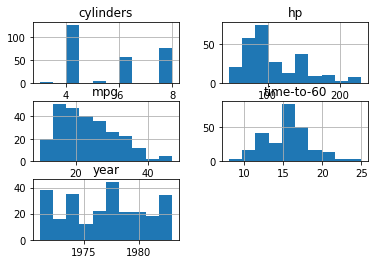

In [47]:
dataset.hist()

In [48]:
dataset.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [78]:
x_values = dataset.iloc[:, 0: len(dataset.columns) - 1]
y_values = dataset.iloc[:, -1]

In [79]:
print(x_values.shape)
print(y_values.shape)
print(type(x_values))
print(type(y_values))

(261, 7)
(261,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [80]:
x_values.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


In [81]:
y_values.head()

0         US.
1     Europe.
2         US.
3         US.
4         US.
Name: brand, dtype: object

In [54]:
# values unique of y values
y_values.unique()

array([' US.', ' Europe.', ' Japan.'], dtype=object)

In [82]:
# appy LabelEncode
# encode_inst = LabelEncoder()
# x_values['cubicinches'] = encode_inst.fit_transform(x_values['cubicinches'])
# x_values['weightlbs'] = encode_inst.fit_transform(x_values['weightlbs'])
x_values['cubicinches'] = pd.to_numeric(x_values['cubicinches'], errors='coerce')
x_values['weightlbs'] = pd.to_numeric(x_values['weightlbs'], errors='coerce')

In [56]:
x_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 14.4 KB


In [60]:
print(x_values['cubicinches'][40])
print(x_values['cubicinches'][180])

200.9189189189189
200.9189189189189


In [58]:
x_values.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,259.000000,261.000000,258.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,109.258305,40.499959,854.039019,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,99.500000,75.000000,2248.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2867.500000,16.000000,1977.000000
75%,28.800000,8.000000,303.000000,138.000000,3670.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [83]:
x_values['cubicinches'] = x_values['cubicinches'].fillna(x_values['cubicinches'].mean())
x_values['weightlbs'] = x_values['weightlbs'].fillna(x_values['weightlbs'].mean())

In [32]:
x_values.isna().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
dtype: int64

In [61]:
x_values.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [62]:
x_values['mpg'].median()

22.0

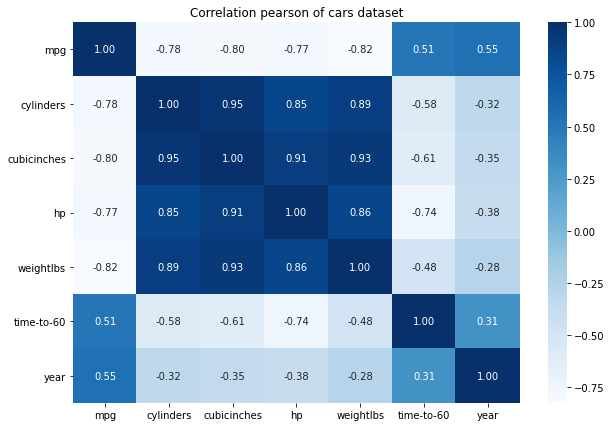

In [63]:
# coeficient pearson
data_heatmap = x_values[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']]
plt.figure(figsize=(10, 7))
sns.heatmap(data_heatmap.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlation pearson of cars dataset')
plt.show()

In [64]:
 from sklearn.metrics import r2_score
 r2_score(x_values['mpg'], x_values['cylinders'])

-5.447397372911916

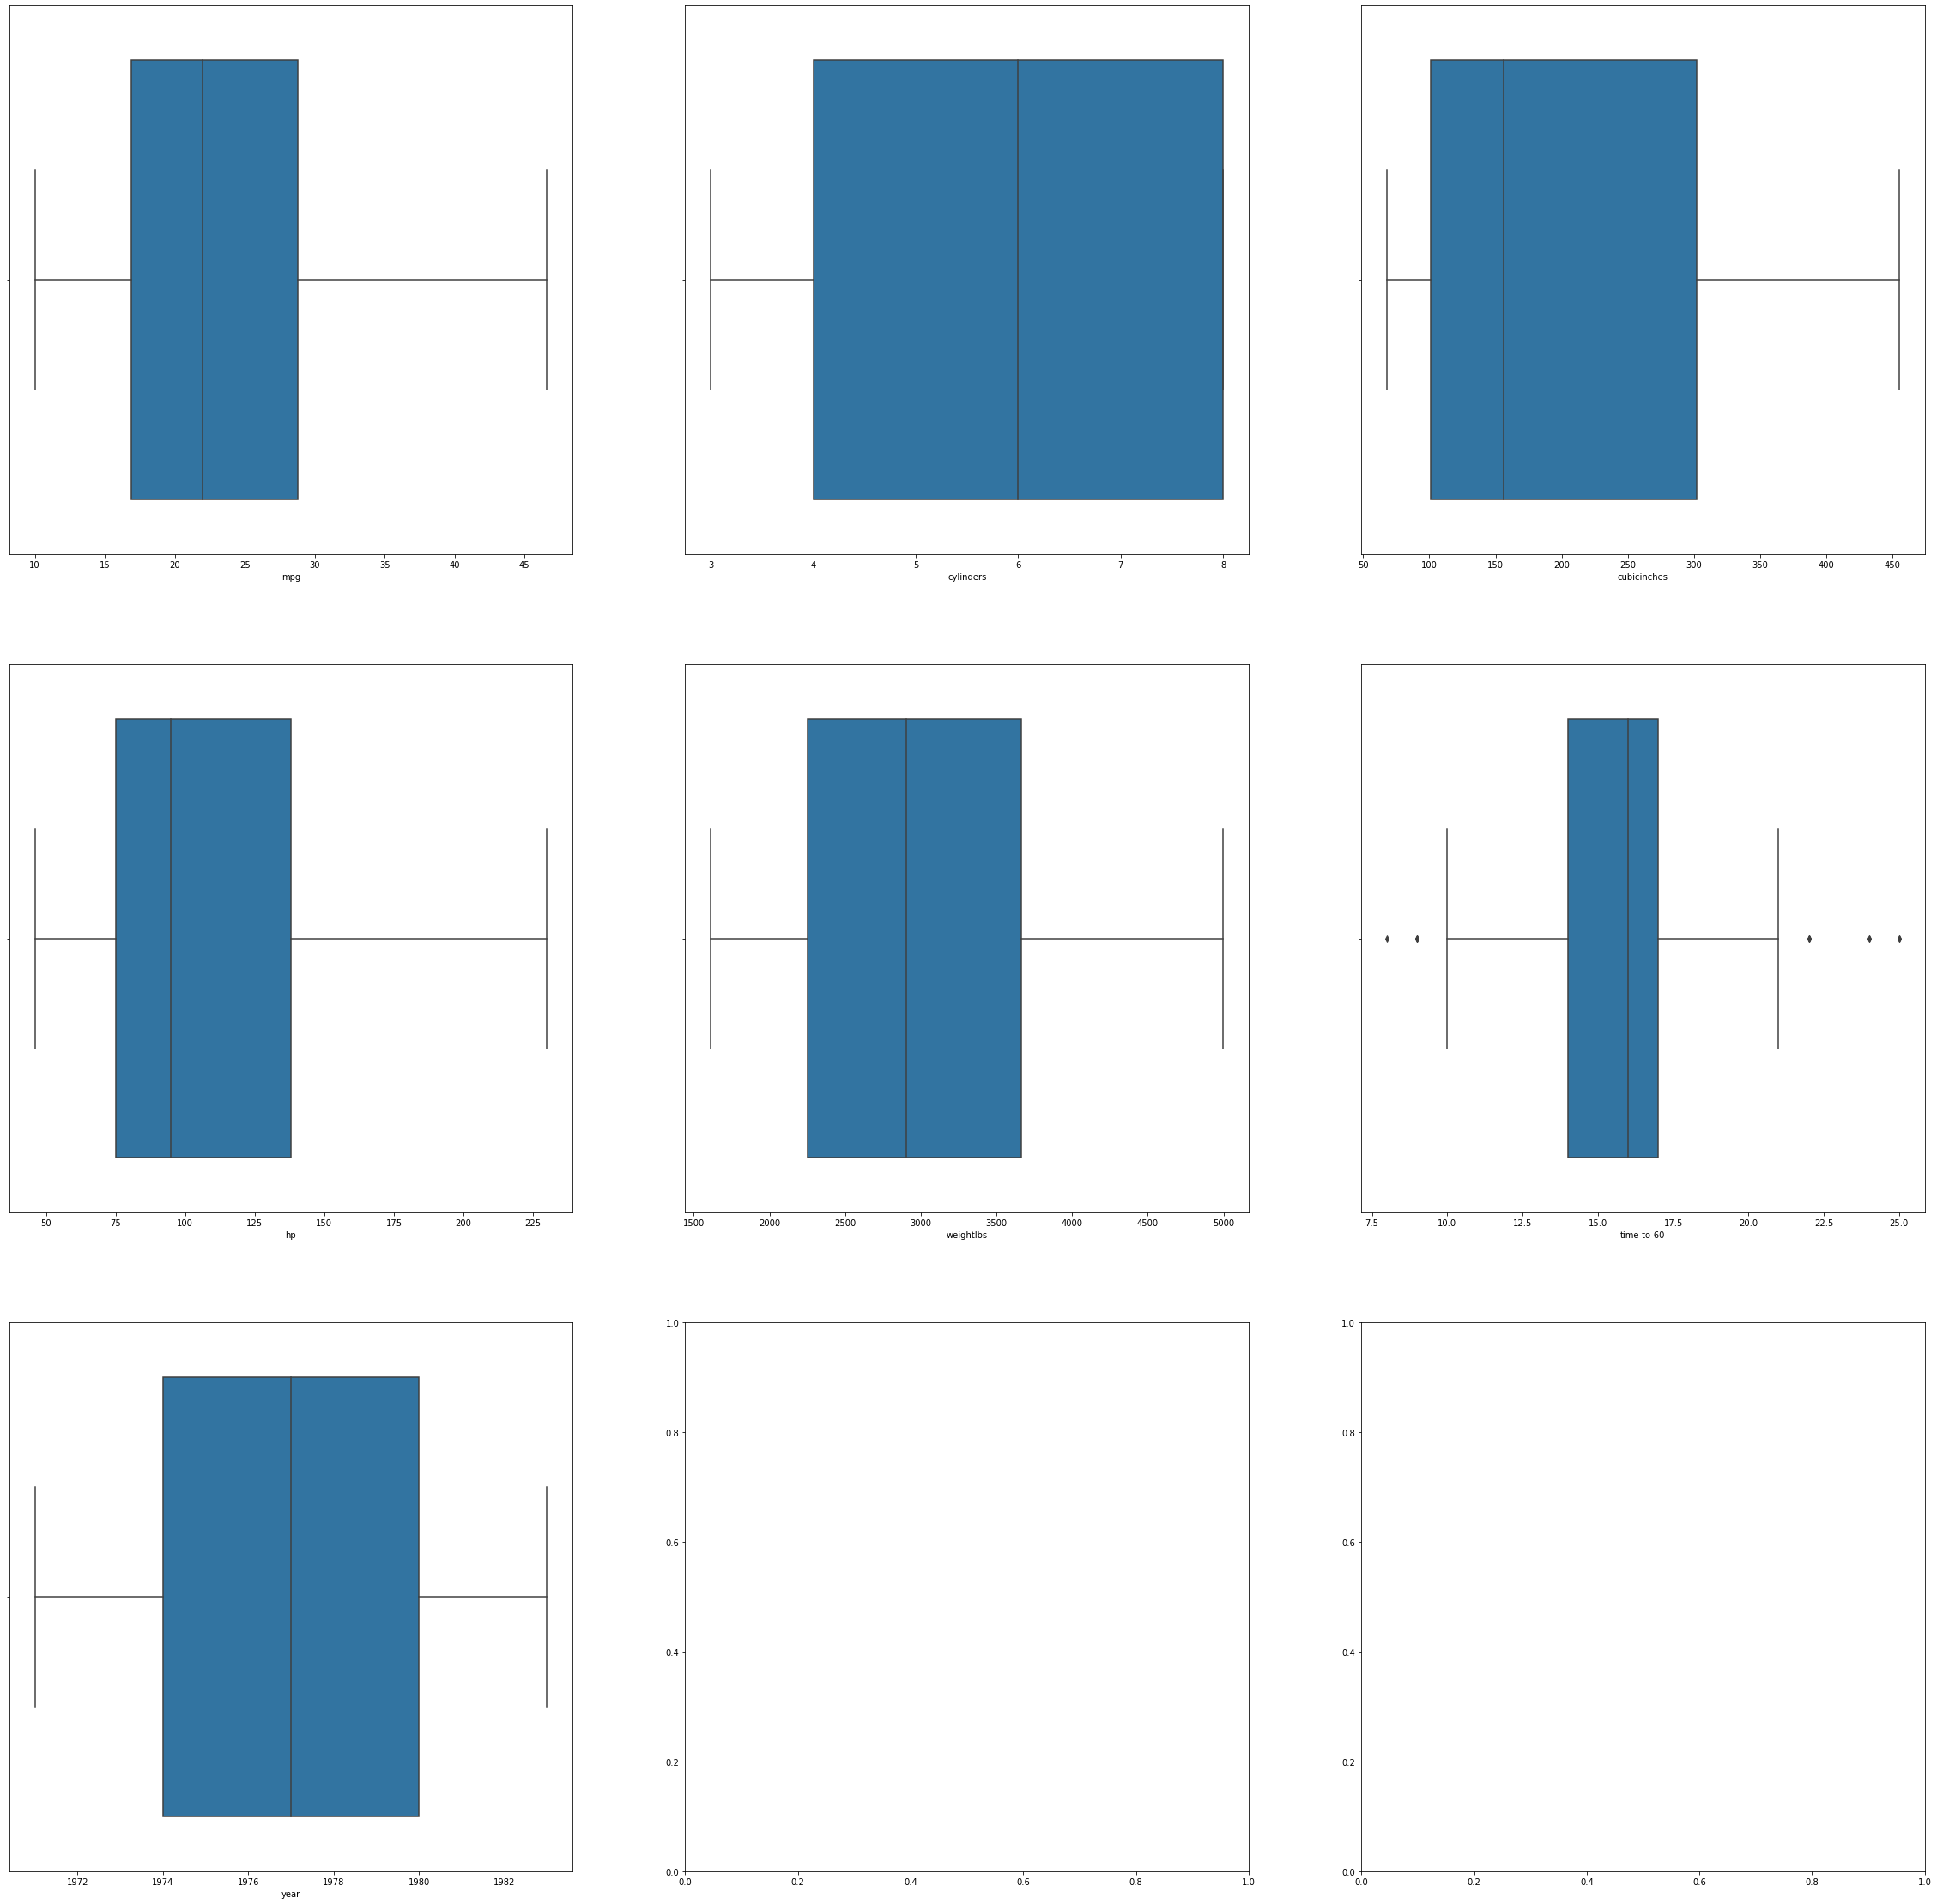

In [38]:
f, axes = plt.subplots(3, 3, figsize=(40, 40))
count = 0
i = 0

for index, column in enumerate(x_values.columns):
  sns.boxplot(x=column, data=x_values, ax=axes[i][count])
  count += 1
  if (index + 1) % 3 == 0:
    count = 0
    i += 1

In [84]:
# normalize the data
from  sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(x_values)

In [85]:
scaled_values[3].max()

1.8326770191914779

In [86]:
x_values = pd.DataFrame(scaled_values, index=x_values.index, columns=x_values.columns)

In [87]:
# x_values
x_values.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02
mean,3.143505e-16,2.124737e-16,-1.203805e-16,9.831429e-17,-1.648320e-16,-2.043916e-16,-2.605329e-15
std,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00
min,-1.683385e+00,-1.497144e+00,-1.223609e+00,-1.493239e+00,-1.648240e+00,-2.598203e+00,-1.602966e+00
25%,-7.997404e-01,-9.191048e-01,-9.198217e-01,-7.758132e-01,-8.918710e-01,-5.328295e-01,-7.766842e-01
50%,-1.466117e-01,2.369740e-01,-4.135093e-01,-2.810368e-01,-1.248816e-01,1.556284e-01,4.959804e-02
75%,7.242265e-01,1.393053e+00,9.305202e-01,7.827325e-01,7.719060e-01,4.998573e-01,8.758803e-01
max,3.003774e+00,1.393053e+00,2.338990e+00,3.058704e+00,2.344824e+00,3.253689e+00,1.702163e+00


In [72]:
x_values['hp'].max()

3.05870398977614

## Reduce dimension number of features

In [88]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
reduce_dim = pca.fit(scaled_values)

# x_values = pd.DataFrame(reduce_dim, index=x_values.index, columns=x_values.columns)

In [74]:
x_values.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,3.485219,0.526326,-0.139738,0.258792,0.086902,-0.179206,0.079078
1,-2.176912,-0.285424,-1.304613,-0.100465,-0.289698,-0.041147,-0.013127
2,2.684973,1.046946,-0.732156,0.498227,-0.535168,-0.075745,0.159956
3,3.534648,0.847619,-0.801334,0.506630,-0.435696,-0.144237,-0.483162
4,-2.299222,0.194808,-0.221704,0.079650,-0.175655,0.015566,-0.069958


In [90]:
# value of variance explain by pca
reduce_dim.explained_variance_ratio_

array([0.72371349, 0.12675138, 0.09126131, 0.02773591, 0.01766794,
       0.00798425, 0.00488572])

In [91]:
print(reduce_dim.singular_values_)

[36.36240564 15.21758127 12.91256795  7.11853318  5.68148989  3.81932178
  2.9876755 ]


## Clustering

In [94]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
model_kmeans = kmeans.fit_predict(x_values[['mpg', 'cylinders', 'cubicinches']])

In [97]:
print(kmeans.cluster_centers_)

[[ 0.78510642 -0.90576545 -0.8462471 ]
 [-1.03776954  1.39305285  1.3699381 ]
 [-0.43269855  0.23697401  0.12976368]]


In [102]:
unique, counts = np.unique(model_kmeans, return_counts=True)
dict(zip(unique, counts))

{0: 130, 1: 75, 2: 56}

In [ ]:
encode_y = LabelEncoder()
label_encoder_y = encode_y.fit_transform(y_values)
print(label_encoder_y)

[2 0 2 2 2 2 2 2 0 1 1 0 2 2 2 2 1 2 1 0 1 0 2 2 1 1 1 2 2 2 1 2 1 2 1 2 0
 1 2 2 2 2 2 2 2 1 2 2 0 2 2 0 2 0 2 2 1 2 0 2 2 1 1 1 2 2 0 1 0 2 2 2 1 1
 0 2 2 1 0 1 2 2 2 0 0 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 0 0 2 1
 0 2 1 0 2 2 2 2 2 0 0 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2 0 0 2 1 1 1 2 0 2 2
 2 2 1 1 2 2 0 2 1 1 2 0 2 2 2 2 0 2 2 2 1 2 1 0 0 2 2 0 2 2 2 1 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 0 0 1 0 2 2 2 2 2 1 2 2 1 1 2 1 0 2 1 1 2 2 2 2 0
 2 0 2 1 2 1 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 0 2 2 2 0 1 2 2 0 0 2 2 1 2 1 2
 2 2]


## Separate database in train and test

In [106]:
y_values_effic = []
for i in dataset['mpg']:
  if i > 25:
    y_values_effic.append(1)
  else:
    y_values_effic.append(0)

In [108]:
y_valeus_final_eff = pd.Series(y_values_effic)
print(y_valeus_final_eff)

0      0
1      1
2      0
3      0
4      1
      ..
256    0
257    1
258    0
259    0
260    0
Length: 261, dtype: int64


In [109]:
x_train, x_test, y_train, y_test = train_test_split(
    x_values[['cylinders' ,'cubicinches' ,'hp' ,'weightlbs','time-to-60']],
    y_valeus_final_eff, 
    test_size=0.30, 
    random_state=42
  )

In [110]:
print(x_train.shape)
print(x_test.shape)

(182, 5)
(79, 5)


## Classifiers

### Decision tree

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [112]:
predy_tree = tree_model.predict(x_test)
acc_tree = accuracy_score(y_test, predy_tree)
print(acc_tree)

0.8734177215189873


In [113]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predy_tree))

[[33  8]
 [ 2 36]]


### Logistic regression

In [114]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
predy_log = log_reg_model.predict(x_test)
print(accuracy_score(y_test, predy_tree))

0.8734177215189873
